# BPM Model Results

In [223]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

mainDir = '/Users/rachelanderson/Desktop/Research/Anderson_TermPaper_515'
gammaDir = mainDir + '/Data/Gamma/'
Zdir = mainDir + '/Data/Ztrue/'
outputDir = mainDir + '/Data/bpmGibbsOutput/'
figDir = mainDir + '/Figures/bpm/'

In [80]:
ext = 'nM2_L4'
df = pd.read_csv(outputDir + 'trace_' + ext + '.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

N = len(df)
burnIn = 2000
df_burnt = df[50000:N]
df_burnt.head()

,pM,pML_1,pML_2,pML_3,pML_4,pUL_1,pUL_2,pUL_3,pUL_4,llh
50000,0.198378,0.258023,0.431808,0.050105,0.020847,0.161986,0.161022,0.232835,0.177418,-231.977124
50001,0.325540,0.551683,0.199873,0.027459,0.165342,0.202241,0.275208,0.353186,0.201427,-230.645597
50002,0.558372,0.105208,0.370689,0.527562,0.130096,0.177917,0.317393,0.309159,0.211635,-233.459264
50003,0.568675,0.131501,0.077291,0.163613,0.029980,0.181870,0.293152,0.269911,0.191378,-231.142843
50004,0.577589,0.309405,0.295822,0.093717,0.058700,0.210788,0.273725,0.349052,0.218174,-233.343703


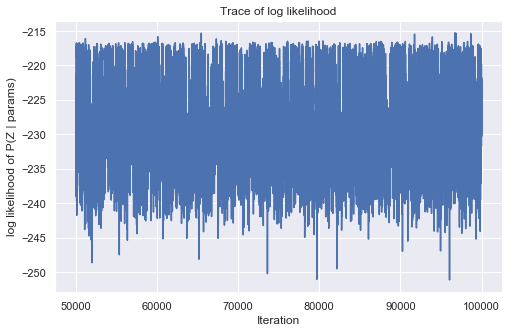

In [81]:
sns.set(rc={'figure.figsize':(8,5)})
plt.plot(df_burnt['llh'])
plt.title('Trace of log likelihood')
plt.xlabel('Iteration')
plt.ylabel('log likelihood of P(Z | params)')

### Did the chain converge?
#### $m-$ probabilities

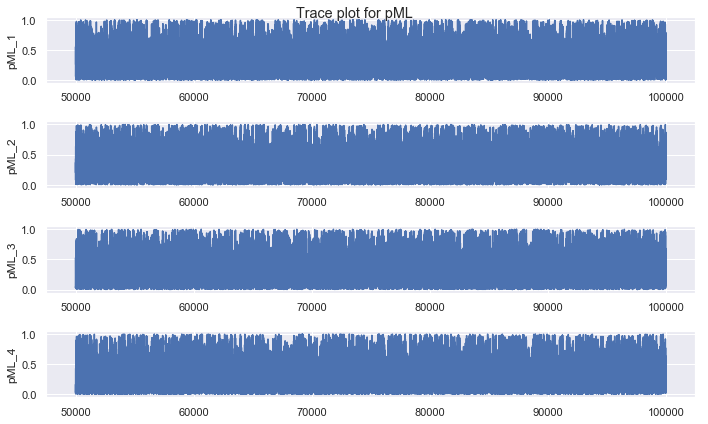

In [84]:
plt.figure(1, figsize=(10, 6))

plt.subplot(411)
plt.plot(df_burnt[['pML_1']])
plt.ylabel('pML_1')

plt.subplot(412)
plt.plot(df_burnt[['pML_2']])
plt.ylabel('pML_2')

plt.subplot(413)
plt.plot(df_burnt[['pML_3']])
plt.ylabel('pML_3')

plt.subplot(414)
plt.plot(df_burnt[['pML_4']])
plt.ylabel('pML_4')

plt.suptitle('Trace plot for pML')
plt.tight_layout()
plt.savefig(figDir + 'traceML_' + ext + '.png')
plt.show()

## $u$- probabilities

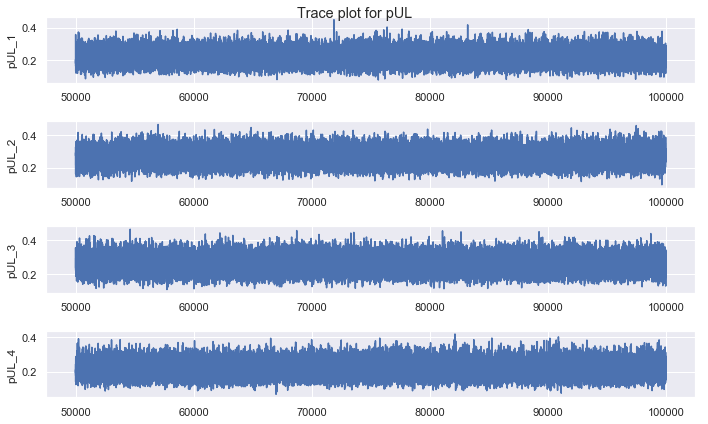

In [85]:
plt.figure(1, figsize=(10, 6))

plt.subplot(411)
plt.plot(df_burnt[['pUL_1']])
plt.ylabel('pUL_1')

plt.subplot(412)
plt.plot(df_burnt[['pUL_2']])
plt.ylabel('pUL_2')

plt.subplot(413)
plt.plot(df_burnt[['pUL_3']])
plt.ylabel('pUL_3')

plt.subplot(414)
plt.plot(df_burnt[['pUL_4']])
plt.ylabel('pUL_4')

plt.suptitle('Trace plot for pUL')
plt.tight_layout()
plt.savefig(figDir + 'traceUL_' + ext + '.png')
plt.show()

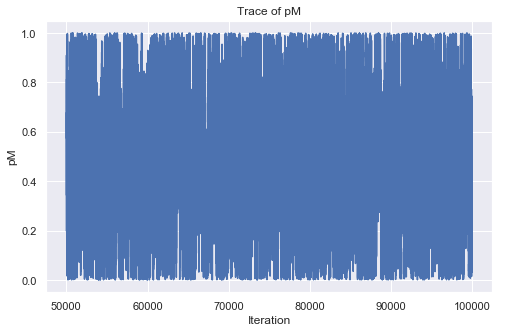

In [86]:
plt.plot(df_burnt[['pM']])
plt.title('Trace of pM')
plt.xlabel('Iteration')
plt.ylabel('pM')
plt.savefig(figDir + 'traceM_' + ext + '.png')

### Histogram of params

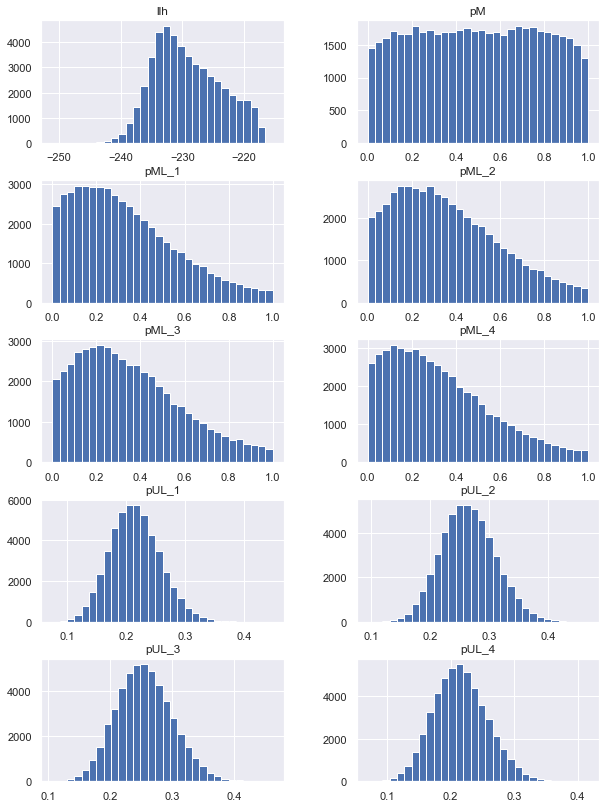

In [87]:
plt.rcParams['figure.figsize'] = (10, 14)
hist_plot = df_burnt.hist(bins=30,layout=(5,2))
plt.savefig(figDir + 'allParam_' + ext + '.png')

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


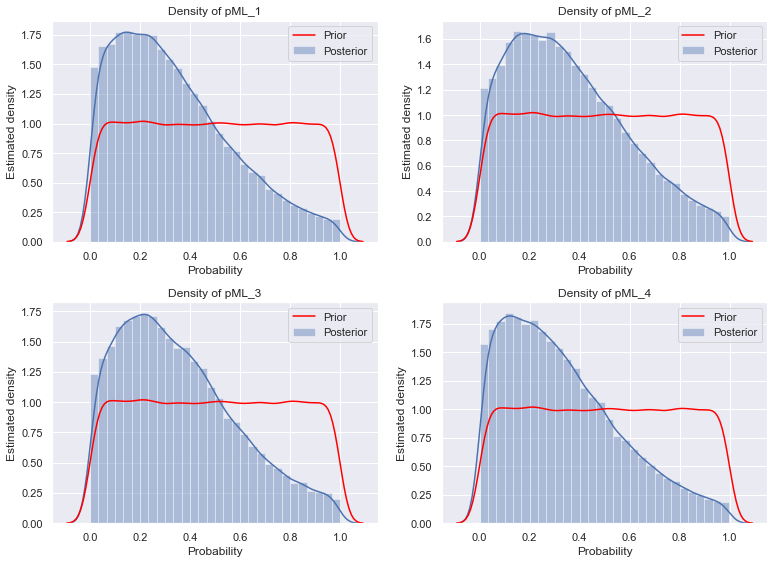

In [88]:
sns.set(rc={'figure.figsize':(11,8)})
from scipy.stats import beta
data_beta = beta.rvs(1,1, size=100000)
L = 4

for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    string = 'pML_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label = 'Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')

plt.tight_layout()
plt.savefig(figDir + 'pML_' + ext + '.png')
plt.show()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


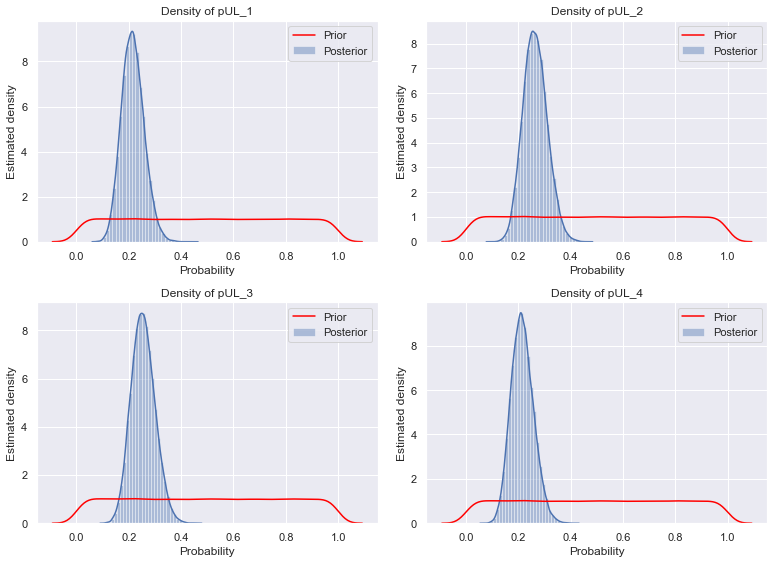

In [89]:
L = 4

for i in range(L):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    string = 'pUL_' + str(i+1)
    # Draw the plot
    sns.distplot(eval('df_burnt[[\'' + string + '\']]'), bins=30, label='Posterior')
    sns.distplot(data_beta, color='red', hist=False, label='Prior')
    
    # Title and labels
    ax.set_title('Density of %s' % string)
    ax.set_xlabel('Probability')
    ax.set_ylabel('Estimated density')
    
plt.tight_layout()
plt.savefig(figDir + 'pUL_' + ext + '.png')
# plt.show()

### Now the interesting part -- Z trace!

In [169]:
Zout = pd.read_csv(outputDir + 'Z_trace_' + ext + '.csv')
Zout=Zout.drop(['Unnamed: 0'], axis = 1)
Zout_burnt = Zt[burnIn:N]

In [170]:
Zout_burnt.head()

,0,1,2,3,4,5,6,7,8,9
2000,10,11,4,13,14,15,16,17,18,19
2001,10,11,4,13,14,15,16,17,18,19
2002,5,11,4,13,14,15,16,17,18,19
2003,5,11,4,13,14,15,16,17,7,19
2004,5,11,4,13,14,15,16,17,18,19


In [49]:
Ztrue = pd.read_csv(Zdir + 'Ztrue_' + ext + '.csv')
Ztrue=Ztrue.drop(['Unnamed: 0'], axis = 1)
Ztrue

,0
0,10
1,11
2,12
3,5
4,3
5,15
6,16
7,17
8,18
9,19


In [299]:
Ztrue = pd.read_csv(Zdir + 'Ztrue_' + ext + '.csv')
Ztrue=Ztrue.drop(['Unnamed: 0'], axis = 1)
Ztrue = Ztrue.transpose()
Ztrue.values[0] = [i if i<10 else 99 for i in Ztrue.values[0]]
Ztrue.values[0]

array([99, 99, 99,  5,  3, 99, 99, 99, 99, 99])

In [253]:
def make_counts(Zout):
    Zcounts = {}
    for i in Zout.columns:
        Zout[i] = [y if y < 10 else 99 for y in Zout[i]]
        Zcounts['x' + str(i)] = Zout[i].value_counts().to_dict()
    return Zcounts

In [309]:
Zcounts = make_counts(Zout)
z = pd.DataFrame(Zcounts)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,5174,5464,4550,4950,4866,4722,5277,5689,4818,5429
1,5421,5608,4868,5364,4514,5417,4967,4476,5168,4695
2,5527,4474,5663,5185,5599,4914,4820,4660,5228,5005
3,4602,4913,5303,5136,5118,5550,5240,5013,4927,4458
4,5182,4603,4833,4918,5389,5274,4848,4805,5034,5205
5,4719,5496,5096,5342,4794,5510,4846,5282,5439,4673
6,5381,4827,4566,4667,4869,5383,5054,5118,5318,5592
7,4656,5056,5474,5331,5274,4644,4678,5133,4960,4807
8,4756,4992,4791,4756,5020,4693,6031,5456,4873,4984
9,5092,4593,5035,5045,5584,4612,4773,5254,5107,6076


In [355]:
Zgraph = pd.DataFrame(0, index = np.unique(Ztrue.values[0]), columns = z.columns)
for x in range(n2):
    Zgraph['x' + str(x)] = [N if Ztrue[x][0] == Zgraph['x' + str(x)].index[i] else 0 for i in range(Zgraph.shape[0])]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
3,0,0,0,0,100000,0,0,0,0,0
5,0,0,0,100000,0,0,0,0,0,0
99,100000,100000,100000,0,0,100000,100000,100000,100000,100000


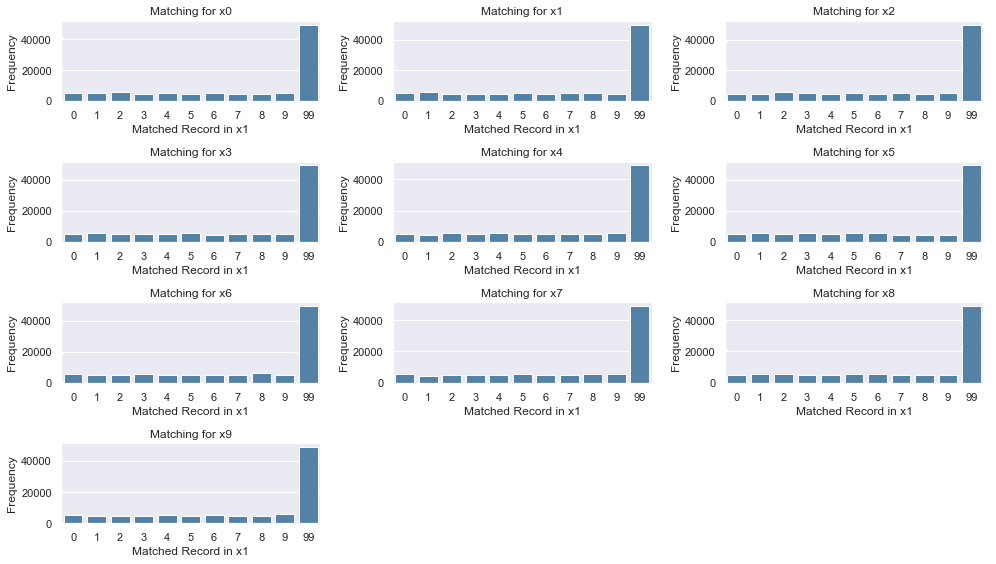

In [375]:
sns.set(rc={'figure.figsize':(14,8)})
n2 = n1= 10
for i in range(n2):
    # Set up the plot
    ax = plt.subplot(4, 3, i + 1)
    
    xVar = 'x' + str(i)
    # Draw the plot
    top_plot = sns.barplot(x=z.index, y=xVar, data = z, color = 'steelblue')
#     bottom_plot = sns.barplot(x = Zgraph.index, y = xVar, data=Zgraph, color = "#0000A3")
    
    # Title and labels
    ax.set_title('Matching for %s' % xVar)
    ax.set_xlabel('Matched Record in x1')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(figDir + 'Zmatches' + ext + '.png')
plt.show()

TypeError: 'range' object is not callable

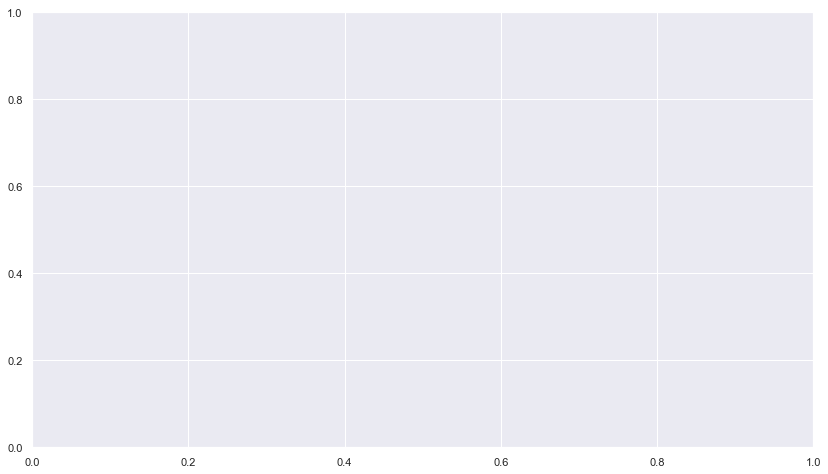

In [372]:
fig, ax = plt.subplots()
sns.barplot(x=range(n1), y=z['x2'], ax=ax)
sns.barplot(x=range(n1), y=Zgraph['x2'], ax = ax)

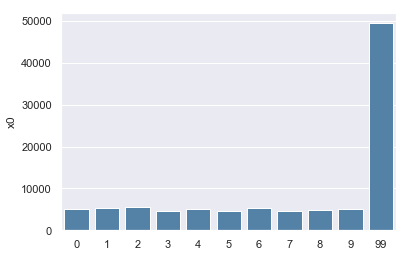

In [229]:


sns.barplot(x=z.index, y='x0', data = z, color='steelblue')
ax.set_title('Z matches for x0')

In [212]:
np.array(Zcounts['1'].keys())

KeyError: '1'